In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

csv_data_raw = pd.read_csv('final_merged_data.csv')

In [3]:
csv_data_raw.isna().sum()

csv_data_raw = csv_data_raw.dropna()
csv_data_raw.isna().sum()

Company Name_x               0
TICKER                       0
Quarter                      0
Price                        0
Total Ret                    0
Price Ret Ex-Dividend        0
Weighted Mkt Return          0
Volume                       0
Dividend                     0
Price Low                    0
Price High                   0
Shares Outstanding           0
Excess Return                0
Mkt Cap                      0
Price Growth Rate            0
Quart Rev                    0
Quart NI                     0
Equity                       0
Liabilities                  0
Revenue                      0
Industry Code                0
Asset                        0
Current Asset                0
EPS                          0
Rating                       0
Revenue Growth               0
Earnings Growth Rate         0
P/E Ratio Annual             0
P/E Ratio Quarter            0
Mean Recommendation          0
Median Recommendation        0
Recommendation StdDev        0
Number o

In [4]:
# Overview of the data
csv_data_raw.head(10)

,Company Name_x,TICKER,Quarter,Price,Total Ret,Price Ret Ex-Dividend,Weighted Mkt Return,Volume,Dividend,Price Low,...,P/E Ratio Quarter,Mean Recommendation,Median Recommendation,Recommendation StdDev,Number of Recommendations,Number of Upgrades,Number of Downgrades,Buy Percentage,Sell Percentage,Hold Percentage
0,AMERICAN AIRLINES GROUP INC,AAL,2014Q2,39.396667,0.173056,0.057685,0.016600,7852461.0,0.0,35.07,...,32.882202,1.940000,2.0,0.733333,49,1,0,77.573333,0.000000,22.426667
1,AMERICAN AIRLINES GROUP INC,AAL,2014Q3,37.737000,-0.180017,-0.060781,-0.001849,6449143.0,0.1,35.48,...,28.809702,1.883333,2.0,0.693333,52,0,0,82.676667,0.000000,17.323333
2,AMERICAN AIRLINES GROUP INC,AAL,2014Q4,47.836667,0.446994,0.148058,0.012870,10121212.0,0.1,41.35,...,56.944677,1.833333,2.0,0.643333,54,2,0,87.033333,0.000000,12.966667
3,AMERICAN AIRLINES GROUP INC,AAL,2015Q1,49.920000,-0.004967,-0.002335,0.006118,7988790.0,0.1,47.90,...,37.277992,1.776667,2.0,0.643333,54,0,2,88.886667,0.000000,11.113333
4,AMERICAN AIRLINES GROUP INC,AAL,2015Q2,43.530000,-0.263242,-0.088379,-0.000063,7058747.0,0.1,39.93,...,17.574531,2.006667,2.0,0.753333,51,0,3,72.250000,0.000000,27.750000
5,AMERICAN AIRLINES GROUP INC,AAL,2015Q3,39.303333,-0.025152,-0.009215,-0.027191,6966704.0,0.1,38.80,...,15.351051,2.230000,2.0,0.763333,48,1,1,58.333333,0.000000,41.666667
6,AMERICAN AIRLINES GROUP INC,AAL,2015Q4,43.276667,0.111586,0.036474,0.018044,5420601.0,0.1,41.26,...,8.288974,2.340000,3.0,0.826667,44,0,2,45.400000,0.000000,54.600000
7,AMERICAN AIRLINES GROUP INC,AAL,2016Q1,40.333333,-0.024979,-0.009181,0.004675,5852735.0,0.1,38.98,...,34.826835,2.136667,2.0,0.753333,43,3,0,65.396667,0.000000,34.603333
8,AMERICAN AIRLINES GROUP INC,AAL,2016Q2,31.636667,-0.344182,-0.115688,0.009668,6854349.0,0.1,28.30,...,18.798674,2.110000,2.0,0.756667,45,2,2,71.110000,2.223333,26.666667
9,AMERICAN AIRLINES GROUP INC,AAL,2016Q3,36.136667,0.287866,0.095016,0.014876,5923082.0,0.1,35.50,...,25.807023,2.273333,2.0,1.010000,40,1,2,65.200000,15.016667,19.776667


Select Features

In [5]:
# Define features
NUMERIC_FEATURES = list(set([
     'Price Growth Rate',
     'Revenue Growth',
     'P/E Ratio Annual',
     'P/E Ratio Quarter',
     'Mean Recommendation',
     'Median Recommendation',
     'Recommendation StdDev',
     'Number of Recommendations',
     'Number of Upgrades',
     'Number of Downgrades',
     'Buy Percentage',
     'Sell Percentage',
     'Hold Percentage',
     'Mkt Cap',
     'Weighted Mkt Return',
     'Price Ret Ex-Dividend',
     'Weighted Mkt Return',
     'Volume',
     'Dividend',
     'Price Low',
     'Price High',
     'Shares Outstanding',
     'Mkt Cap',
     'Price Growth Rate',
     'Quart Rev',
     'Quart NI',
     'Equity',
     'Liabilities',
     'Revenue',
     'Asset',
     'Current Asset',
     'EPS',
     'Revenue Growth',
     'Earnings Growth Rate',
     'P/E Ratio Annual',
     'P/E Ratio Quarter',
     'Mean Recommendation',
     'Median Recommendation',
     'Recommendation StdDev',
     'Number of Recommendations',
     'Number of Upgrades',
     'Number of Downgrades',
     'Buy Percentage',
     'Sell Percentage',
     'Hold Percentage',
    ]))
ONE_HOT_FEATURES = ['Rating', 'Industry Code']

In [6]:
data = csv_data_raw
TARGET = 'Total Ret'
FEATURES = features = [col for col in data.columns if col not in ['TICKER', 'Company Name_x', 'Quarter', TARGET]]
data = data.sort_values(by=['TICKER', 'Quarter']).reset_index(drop=True)
data[TARGET] = data.groupby('TICKER')['Total Ret'].shift(-1)


# SICCD to Industry Mapping (Short Names)
siccd_mapping = {
    range(100, 1000): "Agriculture",
    range(1000, 1500): "Mining",
    range(1500, 1800): "Construction",
    range(2000, 4000): "Manufacturing",
    range(4000, 5000): "Transport",
    range(5000, 6000): "Retail",
    range(6000, 6800): "Finance",
    range(7000, 9000): "Services",
    range(9100, 10000): "Public",
}
def map_sic_to_industry(sic_code):
    for key, value in siccd_mapping.items():
        if sic_code in key:
            return value
    return "Others"

# Map Industry
data['Real Industry'] = data['Industry Code'].apply(map_sic_to_industry)

# Transfer the value
data[NUMERIC_FEATURES] = data[NUMERIC_FEATURES].apply(pd.to_numeric, errors='coerce')

# One-Hot
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' 避免多重共线性
encoded_features = encoder.fit_transform(data[['Rating', 'Real Industry']])

# Encode one hot data
encoded_columns = encoder.get_feature_names_out(['Rating', 'Real Industry'])
encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns, index=data.index)
data = pd.concat([data.drop(['Rating', 'Real Industry'], axis=1), encoded_df], axis=1)
data = data.dropna()

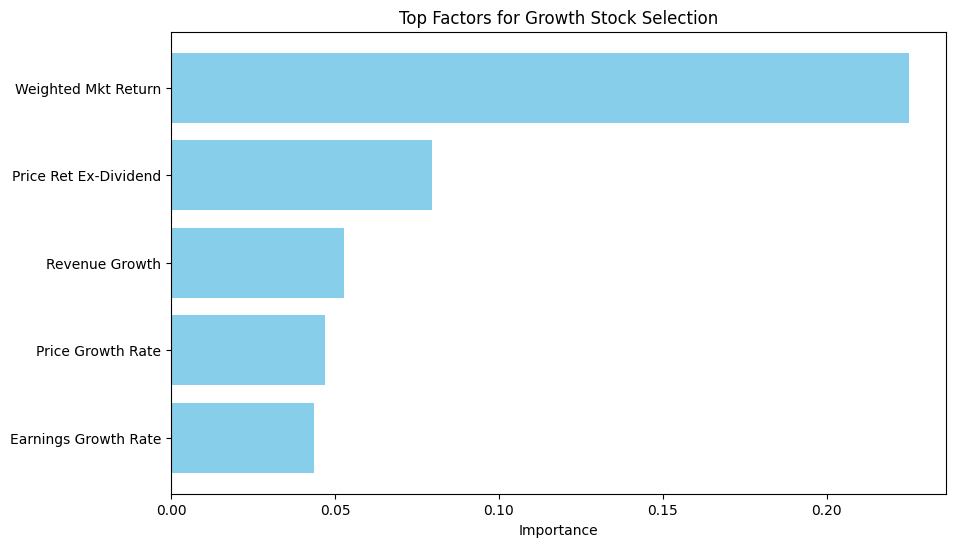

Factor: Weighted Mkt Return
Factor: Price Ret Ex-Dividend
Factor: Revenue Growth
Justification: High revenue growth indicates increasing market demand and potential for future earnings.
Factor: Price Growth Rate
Justification: Positive price momentum can indicate strong investor sentiment.
Factor: Earnings Growth Rate


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define target and features
TARGET = 'Total Ret'
FEATURES = NUMERIC_FEATURES  # Add encoded features if necessary

# Splitting data into train and test sets
X = data[FEATURES]
y = data[TARGET]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Replace Infinite values with a large finite number
X_train = X_train.replace([np.inf, -np.inf], np.nan).fillna(X_train.median())

# Train a Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Feature importance
feature_importances = pd.DataFrame({
    'Feature': FEATURES,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Select top 3-5 factors
top_factors = feature_importances.head(5)

# Visualization of feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_factors['Feature'], top_factors['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top Factors for Growth Stock Selection')
plt.gca().invert_yaxis()
plt.show()

# Print selected factors with justification
for factor in top_factors['Feature']:
    print(f"Factor: {factor}")
    if 'Revenue Growth' in factor:
        print("Justification: High revenue growth indicates increasing market demand and potential for future earnings.")
    elif 'P/E Ratio' in factor:
        print("Justification: A lower P/E ratio may indicate undervaluation, while a higher P/E ratio may signal high growth expectations.")
    elif 'Recommendation' in factor:
        print("Justification: Analyst recommendations often incorporate market insights and future expectations.")
    elif 'Buy Percentage' in factor:
        print("Justification: High buy percentages reflect strong investor confidence.")
    elif 'Price Growth Rate' in factor:
        print("Justification: Positive price momentum can indicate strong investor sentiment.")


In [8]:
from sklearn.metrics import mean_squared_error, r2_score

X_test = X_test.replace([np.inf, -np.inf], np.nan).fillna(X_train.median())

# Predict on the test dataset
y_pred = rf.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Mean Squared Error (MSE) on Test Data: {mse:.4f}")
print(f"R-squared (R²) on Test Data: {r2:.4f}")

Mean Squared Error (MSE) on Test Data: 0.0246
R-squared (R²) on Test Data: 0.2651


Feature Engineering - random forest

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Mean Squared Error (MSE) on Test Data: 0.0208
R-squared (R²) on Test Data: 0.2335
                      Feature  Importance
29        Weighted Mkt Return    0.221957
5       Price Ret Ex-Dividend    0.088353
33     Lag1_Price Growth Rate    0.045172
34        Lag1_Revenue Growth    0.043411
4           Price Growth Rate    0.035645
7        Earnings Growth Rate    0.031992
35      Lag1_P/E Ratio Annual    0.031476
9              Revenue Growth    0.031095
17                  Price Low    0.026217
31        P_E_Weighted_Return    0.025227
30        Revenue_Price_Ratio    0.024870
16                     Volume    0.024808
13      Recommendation StdDev    0.022747
18                 Price High    0.021281
6          Shares Outstanding    0.020575
10                        EPS    0.019766
28                     Equity    0.019447
26        Mean Recommendation    0.019425
8   Number of Recommendations    0.019373
3                 Liabilities    0.018449
15                   Quart NI    0.0

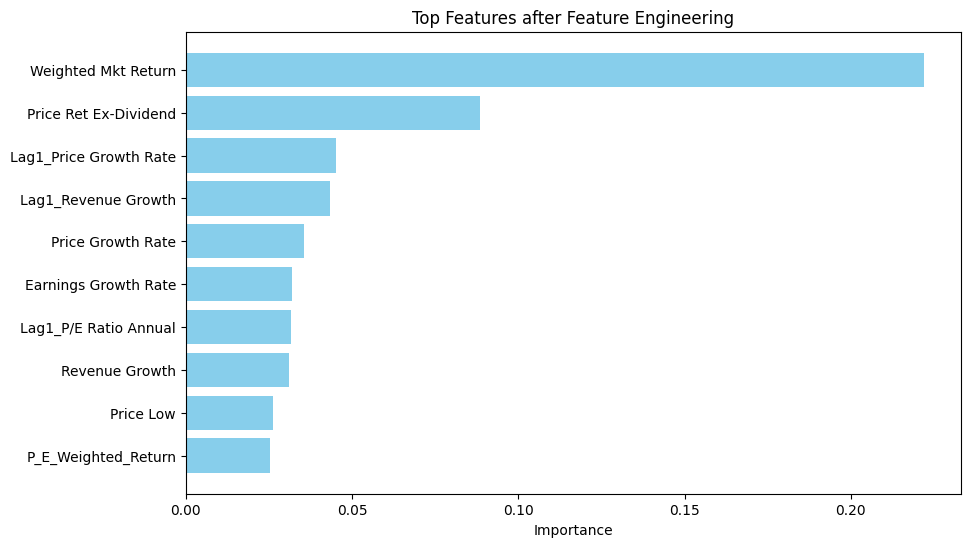

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Perform feature engineering on the dataset

# Interaction features
data['Revenue_Price_Ratio'] = data['Revenue Growth'] / (data['Price Growth Rate'] + 1e-6)
data['P_E_Weighted_Return'] = data['P/E Ratio Annual'] * data['Weighted Mkt Return']
data['Buy_Sell_Spread'] = data['Buy Percentage'] - data['Sell Percentage']

# Lagged features
for feature in ['Price Growth Rate', 'Revenue Growth', 'P/E Ratio Annual']:
    data[f'Lag1_{feature}'] = data.groupby('TICKER')[feature].shift(1)

# Log transformations for skewed variables
for feature in ['P/E Ratio Annual', 'Mkt Cap']:
    data[f'Log_{feature}'] = np.log(data[feature] + 1e-6)

# Drop NaN values generated from lagged features
data = data.dropna()

# Updated feature list after engineering
ENGINEERED_FEATURES = FEATURES + [
    'Revenue_Price_Ratio', 'P_E_Weighted_Return', 'Buy_Sell_Spread',
    'Lag1_Price Growth Rate', 'Lag1_Revenue Growth', 'Lag1_P/E Ratio Annual',
    'Log_P/E Ratio Annual', 'Log_Mkt Cap'
]

# Define X and y for the updated dataset
X = data[ENGINEERED_FEATURES]
y = data[TARGET]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing and infinite values
X_train = X_train.replace([np.inf, -np.inf], np.nan).fillna(X_train.median())
X_test = X_test.replace([np.inf, -np.inf], np.nan).fillna(X_train.median())  # Use train median for consistency

# Train a Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predict on the test dataset
y_pred = rf.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) on Test Data: {mse:.4f}")
print(f"R-squared (R²) on Test Data: {r2:.4f}")

# Feature importance analysis
feature_importances = pd.DataFrame({
    'Feature': ENGINEERED_FEATURES,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'].head(10), feature_importances['Importance'].head(10), color='skyblue')
plt.xlabel('Importance')
plt.title('Top Features after Feature Engineering')
plt.gca().invert_yaxis()
plt.show()

Cross Validation - Random forest

In [10]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer

# Define a custom scorer for Mean Squared Error (negative because higher is better in scoring functions)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

X = X.replace([np.inf, -np.inf], np.nan).fillna(X.median())
y = y.replace([np.inf, -np.inf], np.nan).fillna(y.median())

# Evaluate R² using cross_val_score
r2_scores = cross_val_score(rf, X, y, cv=kf, scoring='r2')
mse_scores = cross_val_score(rf, X, y, cv=kf, scoring=mse_scorer)

# Convert negative MSE scores to positive
mse_scores = -mse_scores

# Display results
print("Cross-Validated R² Scores:", r2_scores)
print("Mean R² Score:", np.mean(r2_scores))
print("Cross-Validated MSE Scores:", mse_scores)
print("Mean MSE Score:", np.mean(mse_scores))


Cross-Validated R² Scores: [0.23764936 0.27761049 0.28276701 0.2831713  0.26930976]
Mean R² Score: 0.2701015831849011
Cross-Validated MSE Scores: [0.02071222 0.01995147 0.01819046 0.01948405 0.0202378 ]
Mean MSE Score: 0.01971519998929183


Running by industry

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Map SICCD to Industry using the provided mapping function
data['Mapped Industry'] = data['Industry Code'].apply(map_sic_to_industry)

# Split data by Mapped Industry and run the Random Forest model for each category
industry_results = {}

# Get unique industries
mapped_industries = data['Mapped Industry'].unique()

# Iterate through each mapped industry and run the model
for industry in mapped_industries:
    print(f"\nRunning model for Mapped Industry: {industry}")

    # Filter data for the current industry
    industry_data = data[data['Mapped Industry'] == industry]

    # Skip industries with very few data points
    if len(industry_data) < 50:
        print(f"Skipping Mapped Industry {industry} due to insufficient data.")
        continue

    # Define X and y for the industry-specific dataset
    X_industry = industry_data[ENGINEERED_FEATURES]
    y_industry = industry_data[TARGET]

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_industry, y_industry, test_size=0.2, random_state=42)

    # Handle missing and infinite values
    X_train = X_train.replace([np.inf, -np.inf], np.nan).fillna(X_train.median())
    X_test = X_test.replace([np.inf, -np.inf], np.nan).fillna(X_train.median())

    # Train a Random Forest model
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)

    # Predict on the test dataset
    y_pred = rf.predict(X_test)

    # Evaluate performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error (MSE) on Test Data for Mapped Industry {industry}: {mse:.4f}")
    print(f"R-squared (R²) on Test Data for Mapped Industry {industry}: {r2:.4f}")

    # Store results
    industry_results[industry] = {
        'MSE': mse,
        'R2': r2,
        'Feature Importances': pd.DataFrame({
            'Feature': ENGINEERED_FEATURES,
            'Importance': rf.feature_importances_
        }).sort_values(by='Importance', ascending=False)
    }

# Display results
for industry, results in industry_results.items():
    print(f"\nResults for Mapped Industry {industry}:")
    print(f"MSE: {results['MSE']}")
    print(f"R²: {results['R2']}")
    print("Top Features:")
    print(results['Feature Importances'].head(10))



Running model for Mapped Industry: Transport
Mean Squared Error (MSE) on Test Data for Mapped Industry Transport: 0.0344
R-squared (R²) on Test Data for Mapped Industry Transport: 0.0520

Running model for Mapped Industry: Manufacturing
Mean Squared Error (MSE) on Test Data for Mapped Industry Manufacturing: 0.0236
R-squared (R²) on Test Data for Mapped Industry Manufacturing: 0.1904

Running model for Mapped Industry: Services
Mean Squared Error (MSE) on Test Data for Mapped Industry Services: 0.0178
R-squared (R²) on Test Data for Mapped Industry Services: 0.1360

Running model for Mapped Industry: Finance
Mean Squared Error (MSE) on Test Data for Mapped Industry Finance: 0.0213
R-squared (R²) on Test Data for Mapped Industry Finance: -0.0698

Running model for Mapped Industry: Retail
Mean Squared Error (MSE) on Test Data for Mapped Industry Retail: 0.0188
R-squared (R²) on Test Data for Mapped Industry Retail: 0.0648

Running model for Mapped Industry: Mining
Mean Squared Error (MS